In [1]:
import scipy
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
# code used in practical 9

from sklearn.feature_selection import SelectKBest, chi2

def chisquared(X_train, X_test, y_train, k):
    x2 = SelectKBest(chi2, k)

    X_train_x2 = x2.fit_transform(X_train,y_train)
    X_test_x2 = x2.transform(X_test)
    return [X_train_x2, X_test_x2]

In [3]:
# code used in practical 9
# for mutual-information based selection

from sklearn.feature_selection import mutual_info_classif
def mi(X_train, X_test, y_train, k):
    mi = SelectKBest(score_func=mutual_info_classif, k=k)
    X_train_mi = mi.fit_transform(X_train,y_train)
    X_test_mi = mi.transform(X_test)
    return [X_train_mi, X_test_mi]

In [13]:
# Creating the train and test data for each feature

df = pd.read_csv(r"recipe_train.csv")


y = df['duration_label']

# creating train and test countvector for name 
countvector = CountVectorizer(stop_words = 'english')

X_name = df['name']
X_name_train, X_name_test, y_train, y_test = train_test_split(X_name, y, test_size=0.33, random_state=42)
X_name_train = countvector.fit_transform(X_name_train)
X_name_test = countvector.transform(X_name_test)
X_name_train_x2 , X_name_test_x2 = chisquared(X_name_train, X_name_test, y_train, 5000)
X_name_train_mi , X_name_test_mi = mi(X_name_train, X_name_test, y_train, 5000)


# creating train and test countvector for steps
stepcv = CountVectorizer(stop_words = 'english')

X_steps = df['steps']
X_steps_train, X_steps_test, y_train, y_test = train_test_split(X_steps, y, test_size=0.33, random_state=42)
X_steps_train = stepcv.fit_transform(X_steps_train)
X_steps_test = stepcv.transform(X_steps_test)
X_steps_train_x2 , X_steps_test_x2 = chisquared(X_steps_train, X_steps_test, y_train, 8000)
X_steps_train_mi , X_steps_test_mi = mi(X_steps_train, X_steps_test, y_train, 8000)


# creating train and test countvector for ingredients
ingcv = CountVectorizer(stop_words = 'english')

X_ing = df['ingredients']
X_ing_train, X_ing_test, y_train, y_test = train_test_split(X_ing, y, test_size=0.33, random_state=42)
X_ing_train = ingcv.fit_transform(X_ing_train)
X_ing_test = ingcv.transform(X_ing_test)
X_ing_train_x2 , X_ing_test_x2 = chisquared(X_ing_train, X_ing_test, y_train, 1000)
X_ing_train_mi , X_ing_test_mi = mi(X_ing_train, X_ing_test, y_train, 1000)


# creating train and test data for number of ingredients
X_ning = df['n_ingredients']
X_ning_train, X_ning_test, y_train, y_test = train_test_split(X_ning, y, test_size=0.33, random_state=42)

# creating train and test data for number of steps
X_nsteps = df['n_steps']
X_nstep_train, X_nstep_test, y_train, y_test = train_test_split(X_nsteps, y, test_size=0.33, random_state=42)

# stack the features needed
X_train = scipy.sparse.hstack([X_name_train, X_steps_train, X_ing_train, X_ning_train.values[:, None]])
X_test = scipy.sparse.hstack([X_name_test, X_steps_test, X_ing_test, X_ning_test.values[:, None]])

X_train_x2 = scipy.sparse.hstack([X_name_train_x2, X_steps_train_x2, X_ing_train_x2, X_ning_train.values[:, None]])
X_test_x2 = scipy.sparse.hstack([X_name_test_x2, X_steps_test_x2, X_ing_test_x2, X_ning_test.values[:, None]])

X_train_mi = scipy.sparse.hstack([X_name_train_mi, X_steps_train_mi, X_ing_train_mi, X_ning_train.values[:, None]])
X_test_mi = scipy.sparse.hstack([X_name_test_mi, X_steps_test_mi, X_ing_test_mi, X_ning_test.values[:, None]])


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass k=5000 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass k=8000 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass k=1000 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [14]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# code used in practical 9

Xs = [(X_train, X_test), (X_train_x2, X_test_x2), (X_train_mi, X_test_mi)]

models = [MultinomialNB(),
          DecisionTreeClassifier(max_depth=None)]

titles = ['MNB',
          'Decision Tree']

X_names = ['complete', 'x2', 'mi']
for title, model in zip(titles, models):
    print('\n',title)
    for X_name, X in zip(X_names, Xs):
        X_train_t, X_test_t = X
        model.fit(X_train_t.todense(), y_train)
        acc = model.score(X_test_t.todense(), y_test)
        print(X_name, 'acc',  acc)

mnb = MultinomialNB().fit(X_train, y_train)
acc_mnb = mnb.predict(X_test)
print(mnb.score(X_test, y_test))
print(classification_report(y_test, acc_mnb))
print(confusion_matrix(y_test, acc_mnb))

dt = DecisionTreeClassifier(max_depth=None)
dt.fit(X_train, y_train)
acc_dt = dt.predict(X_test)
print(acc_dt)
print(dt.score(X_test, y_test))
print(classification_report(y_test, acc_dt))
print(confusion_matrix(y_test, acc_dt))


0.7332575757575758
              precision    recall  f1-score   support

         1.0       0.73      0.71      0.72      5814
         2.0       0.75      0.77      0.76      6712
         3.0       0.62      0.62      0.62       674

    accuracy                           0.73     13200
   macro avg       0.70      0.70      0.70     13200
weighted avg       0.73      0.73      0.73     13200

[[4124 1591   99]
 [1412 5138  162]
 [ 125  132  417]]
[2. 2. 2. ... 1. 2. 2.]
0.7406060606060606
              precision    recall  f1-score   support

         1.0       0.72      0.75      0.73      5814
         2.0       0.77      0.75      0.76      6712
         3.0       0.64      0.57      0.60       674

    accuracy                           0.74     13200
   macro avg       0.71      0.69      0.70     13200
weighted avg       0.74      0.74      0.74     13200

[[4332 1398   84]
 [1516 5059  137]
 [ 143  146  385]]


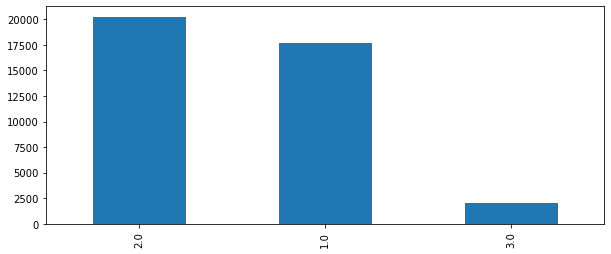

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
df.duration_label.value_counts().plot(kind='bar');